## 빅데이터 활용 AI 설계
# 이미지 처리와 MNIST

### 이미지 불러오기
- 칼러 사진은 채널이 3개이다. => RGB => (높이, 넓이, 채널)
- 흑백 사진은 채널이 1개이다. => (높이, 넓이) 또는 (높이, 넓이, 1)

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
bob = plt.imread('bob_dylan.jpg')

In [3]:
bob.shape, bob.dtype, bob.max()

((355, 355, 3), dtype('uint8'), 255)

In [4]:
bob

array([[[ 57,  55,  40],
        [ 71,  69,  54],
        [ 74,  71,  54],
        ...,
        [146, 147, 129],
        [125, 126, 108],
        [ 85,  86,  68]],

       [[ 51,  49,  34],
        [ 67,  65,  50],
        [ 73,  70,  53],
        ...,
        [144, 142, 129],
        [ 99,  97,  84],
        [ 56,  54,  41]],

       [[ 54,  52,  37],
        [ 66,  64,  49],
        [ 70,  67,  50],
        ...,
        [122, 117, 111],
        [ 59,  54,  48],
        [ 25,  20,  14]],

       ...,

       [[102,  96,  74],
        [ 95,  87,  66],
        [110,  99,  79],
        ...,
        [117, 115,  92],
        [106, 104,  81],
        [ 94,  92,  69]],

       [[108, 102,  80],
        [112, 104,  83],
        [125, 114,  94],
        ...,
        [113, 111,  88],
        [110, 108,  85],
        [106, 104,  81]],

       [[108, 102,  80],
        [129, 121, 100],
        [138, 127, 107],
        ...,
        [101,  99,  76],
        [108, 106,  83],
        [116, 114,  91]]

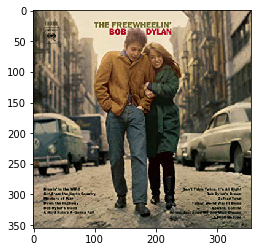

In [5]:
plt.imshow(bob)

### 채널 분리

In [6]:
r = bob[:, :, 0]
g = bob[:, :, 1]
b = bob[:, :, 2]

r.shape

(355, 355)

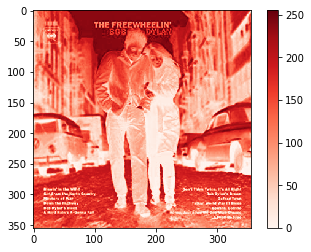

In [7]:
plt.imshow(r, vmin=0, vmax=255, cmap='Reds')
plt.colorbar()

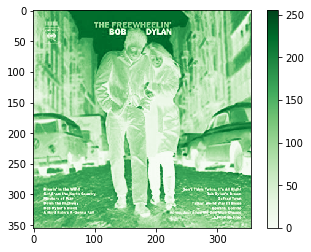

In [8]:
plt.imshow(g, vmin=0, vmax=255, cmap='Greens')
plt.colorbar()

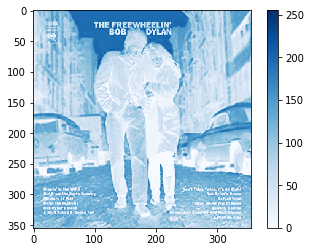

In [9]:
plt.imshow(b, vmin=0, vmax=255, cmap='Blues')
plt.colorbar()

Text(0.5,1,'Blue channel')

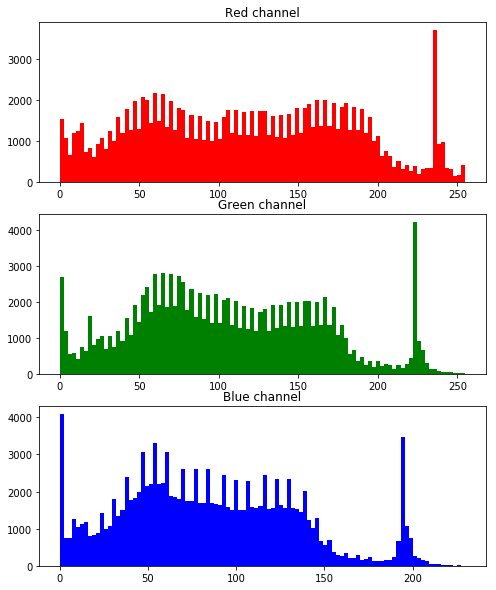

In [10]:
plt.figure(figsize=[8,10])

plt.subplot(3,1,1)
plt.hist(bob[:,:,0].ravel(), bins=100, color='red')
plt.title('Red channel')

plt.subplot(3,1,2)
plt.hist(bob[:,:,1].ravel(), bins=100, color='green')
plt.title('Green channel')

plt.subplot(3,1,3)
plt.hist(bob[:,:,2].ravel(), bins=100, color='blue')
plt.title('Blue channel')

### 사진의 픽셀값
- 정수형 : 값이 0~255 정수값을 가진다 (dtype='uint8')
- 실수형 : 값이 0.0 ~ 1.0 실수값을 가진다 (dtype='float')

### MNIST

In [11]:
from keras.datasets import mnist

C:\Anaconda3\envs\py36\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [12]:
(X_train, y_train), (X_test, y_test) = mnist.load_data() # C:\Users\사용자아이디\.keras\datasets\mnist.npz

In [14]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape, X_train.dtype

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,), dtype('uint8'))

Text(0.5,1,'5')

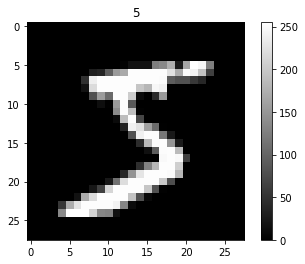

In [16]:
plt.imshow(X_train[0], cmap='gray')
plt.colorbar()
plt.title(y_train[0])

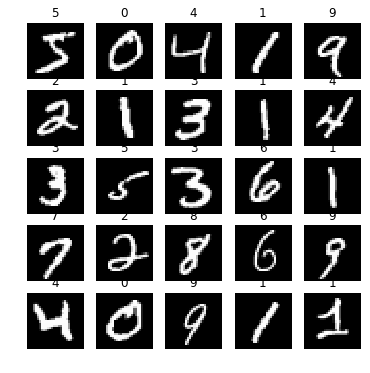

In [17]:
plt.figure(figsize=[6,6])

for i in range(25):
    plt.subplot(5,5,i+1)
    plt.imshow(X_train[i], cmap='gray')
    plt.axis('off')
    plt.title(y_train[i])

In [18]:
import pandas as pd

X_train = X_train.reshape(60000,784)/255.
y_train = pd.get_dummies(y_train).values

X_train.shape, y_train.shape

((60000, 784), (60000, 10))

In [19]:
X_test = X_test.reshape(10000,-1)/255.
y_test = pd.get_dummies(y_test).values

X_test.shape, y_test.shape

((10000, 784), (10000, 10))

- 원핫인코딩은 아래와 같이 적용해도 된다.

```
from keras.utils import to_categorical

y_train = to_categorical(y_train)
y_test = to_categorical(y_test)
```